In [1]:
# importing all necessary libraries to run the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

In [2]:
data = pd.read_csv("googleValidation.csv") 

In [3]:
print('Size before removing Nan: %s'% len(data))
data.dropna(axis=0, inplace=True)
print('Size after removing Nan: %s'% len(data))

Size before removing Nan: 502658
Size after removing Nan: 502658


In [4]:
data=data.reset_index(drop=True)

In [5]:
data.head(2)

,cetagory,app_name,app_id,reviews,rating
0,Sports,Billiards City,com.billiards.city.pool.nation.club,"Wonderfull App. Completed all 1020 levels, Ca...",5
1,Sports,Billiards City,com.billiards.city.pool.nation.club,"It's good, I like the gameplay. Please change...",4


In [7]:
data.rating.value_counts()

5    336781
4     68419
1     49608
3     32238
2     15605
0         7
Name: rating, dtype: int64

In [17]:
len(set(data.app_name))

148

In [6]:
appNames=list((set(data.app_name)))
len(appNames)

148

In [14]:
from textblob import TextBlob
t = TextBlob("He is a cheater. i hate him")
t.sentiment 

Sentiment(polarity=-0.8, subjectivity=0.9)

In [21]:
appRating=[]
for i in range(len(data)):
    for j in range(len(appNames)):
        if data.app_name[i]==appNames[j]:
            appRating.append(data.rating[i])
            

KeyboardInterrupt: 

In [13]:
pd.options.display.max_rows = 4000
data.groupby(['cetagory','rating'])['app_name'].value_counts()

cetagory                 rating  app_name                                          
Arcade                   0       Jewels Legend                                            1
                                 Leps World 2                                             1
                         1       Snow Bros                                              379
                                 Subway Princess Runner                                 281
                                 Bubble Shooter 2                                       256
                                 Super Jabber Jump 3                                    221
                                 Subway Surfers                                         194
                                 Angry Birds Rio                                        192
                                 Temple Run 2                                           185
                                 Space Shooter                                          

In [6]:
pd.options.display.max_rows = 4000
data.groupby('cetagory')['app_name'].value_counts()

cetagory                 app_name                                          
Arcade                   Angry Birds Rio                                       4480
                         Sonic Dash                                            4480
                         Subway Surfers                                        4480
                         Space Shooter                                         4400
                         Bubble Shooter 2                                      4000
                         Jewels Legend                                         4000
                         Leps World 2                                          3000
                         Snow Bros                                             3000
                         Subway Princess Runner                                3000
                         Temple Run 2                                          3000
                         Super Jabber Jump 3                                   2911


In [51]:
pd.options.display.max_rows = 4000
data.groupby('cetagory')['rating'].value_counts()

cetagory                 rating
Arcade                   5         30077
                         4          5352
                         3          2433
                         1          2116
                         2           771
                         0             2
Casual                   5         39258
                         4          6304
                         3          3000
                         1          2798
                         2          1200
Communication            5         15698
                         1          5510
                         4          3824
                         3          2894
                         2          2074
Finance                  5         14884
                         1          6030
                         4          4010
                         3          1993
                         2          1303
Health & Fitness         5         27989
                         4          3857
                         

In [10]:
data.cetagory.value_counts()

Casual                     52560
Shopping                   47840
action                     44141
Racing                     42384
photography                41440
Arcade                     40751
card                       36520
Health & Fitness           34415
Sports                     32280
Communication              30000
Finance                    28220
Weather                    27324
Medical                    24002
Video Players & Editors    20781
Name: cetagory, dtype: int64

In [58]:
pd.options.display.max_rows = 4000
data.groupby('cetagory')['app_name'].value_counts()

cetagory                 app_name                                          
Arcade                   Angry Birds Rio                                       4480
                         Sonic Dash                                            4480
                         Subway Surfers                                        4480
                         Space Shooter                                         4400
                         Bubble Shooter 2                                      4000
                         Jewels Legend                                         4000
                         Leps World 2                                          3000
                         Snow Bros                                             3000
                         Subway Princess Runner                                3000
                         Temple Run 2                                          3000
                         Super Jabber Jump 3                                   2911


In [28]:
import plotly
import matplotlib.pyplot as plt
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
number_of_apps_in_category = data['cetagory'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')
plt.savefig('pie_chart.pdf')

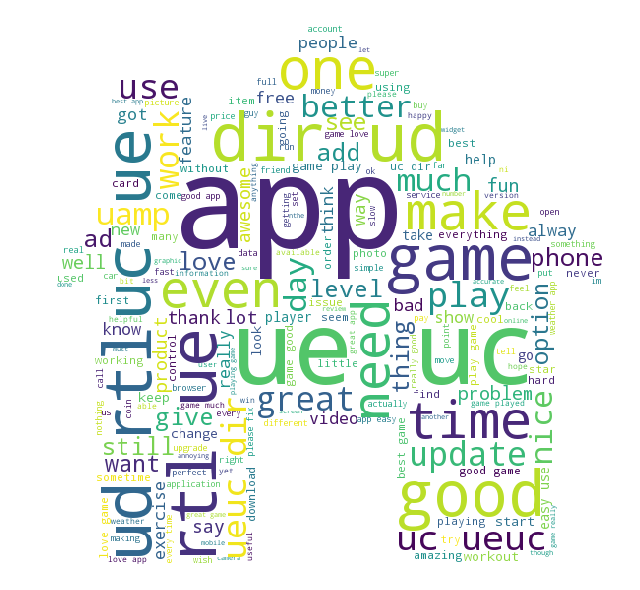

In [98]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

#words = 'access guest guest apartment area area bathroom bed bed bed bed bed bedroom block coffee coffee coffee coffee entrance entry francisco free garden guest home house kettle kettle kitchen kitchen kitchen kitchen kitchen kitchenliving located microwave neighborhood new park parking place privacy private queen room san separate seperate shared space space space street suite time welcome'
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(str1, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str1)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(str1, mask)

In [26]:
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
TEXT=[]
#Rating=[]
for i in range(len(data)):
    #if data['cetagory'][i]=='Racing':
    review = re.sub('[^a-zA-Z]', ' ',data['reviews'][i])
    #review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['reviews'][i])
    #review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',data['reviews'][i])#Remove bad symbols
    review = re.sub(r'\d+', '',review)
    review = review.lower()
    review = review.split()

    review = [token for token in review if token not in sw]
    review=' '.join(review)
    TEXT.append(review)
    #Rating.append(data['rating'][i])

In [26]:
y =data.rating
X=TEXT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(3,3))
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


In [27]:
y =data.rating
X=TEXT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


In [23]:
#Uni-gram TF/IDF
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=5, learning_rate = 0.1)
#clf= LogisticRegression()
#gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
#print("Extra Tree")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
#print("NB")
#print(accuracy_score(y_test, predsGNB))

Random Forest
0.7167933261714347
              precision    recall  f1-score   support

           1       0.59      0.59      0.59     14908
           2       0.28      0.02      0.04      4632
           3       0.32      0.05      0.08      9568
           4       0.35      0.04      0.08     20615
           5       0.74      0.97      0.84    101075

    accuracy                           0.72    150798
   macro avg       0.46      0.33      0.33    150798
weighted avg       0.63      0.72      0.64    150798



In [25]:
#Bi-gram TF/IDF
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=5, learning_rate = 0.1)
#clf= LogisticRegression()
#gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
#print("Extra Tree")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
#print("NB")
#print(accuracy_score(y_test, predsGNB))

Random Forest
0.6891470709160599
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.53      0.39      0.45     14882
           2       0.16      0.04      0.06      4663
           3       0.24      0.07      0.11      9614
           4       0.27      0.07      0.11     20592
           5       0.74      0.95      0.83    101046

    accuracy                           0.69    150798
   macro avg       0.32      0.25      0.26    150798
weighted avg       0.60      0.69      0.62    150798



In [28]:
#Tri-gram TF/IDF
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=5, learning_rate = 0.1)
#clf= LogisticRegression()
#gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
#print("Extra Tree")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
#print("NB")
#print(accuracy_score(y_test, predsGNB))

Random Forest
0.6751879998408467
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.58      0.13      0.21     14870
           2       0.19      0.02      0.04      4719
           3       0.24      0.03      0.05      9782
           4       0.31      0.05      0.08     20499
           5       0.69      0.98      0.81    100926

    accuracy                           0.68    150798
   macro avg       0.34      0.20      0.20    150798
weighted avg       0.58      0.68      0.58    150798



In [28]:
#TF
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=5, learning_rate = 0.1)
#clf= LogisticRegression()
#gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
#print("Extra Tree")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
#print("NB")
#print(accuracy_score(y_test, predsGNB))

Random Forest
0.6994920357033912


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.53      0.55      0.54     14675
           2       0.18      0.04      0.07      4718
           3       0.23      0.08      0.12      9659
           4       0.27      0.09      0.13     20584
           5       0.76      0.94      0.84    101159

    accuracy                           0.70    150798
   macro avg       0.33      0.28      0.28    150798
weighted avg       0.62      0.70      0.64    150798



In [30]:
from gensim.models import Word2Vec
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(data['reviews'])
data = data
tokenized_data = data['reviews'].apply(lambda x: x.split())
model_w2v = Word2Vec( tokenized_data, size=200, window=5, min_count=2,sg = 1, hs = 0, negative = 10, workers= 2, seed = 34)
model_w2v.train(tokenized_data, total_examples= len(data['reviews']), epochs=20)
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
        return vec
wordvec_arrays = np.zeros((len(tokenized_data), 200))
for i in range(len(tokenized_data)):
    wordvec_arrays[i,:] = word_vector(tokenized_data[i], 200)
data_feature_3 = pd.DataFrame(wordvec_arrays)
df_tex = data_feature_3
df_cat = data['rating']
x_train, x_test, y_train, y_test = train_test_split(df_tex, df_cat, test_size=0.3, random_state=2, stratify=df_cat)
y_train = y_train.astype('int')


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [32]:
x_test=x_test.fillna(x_test.mean())
x_train=x_train.fillna(x_train.mean())

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rfc = RandomForestClassifier(n_estimators=10, random_state=52,max_depth=10) 
predRfc=rfc.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test,predRfc))
print(classification_report(y_test,predRfc))

0.6959707688430881


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.54      0.34      0.41     14882
           2       0.00      0.00      0.00      4682
           3       0.44      0.01      0.02      9671
           4       0.00      0.00      0.00     20526
           5       0.71      0.99      0.82    101035

    accuracy                           0.70    150798
   macro avg       0.28      0.22      0.21    150798
weighted avg       0.55      0.70      0.59    150798



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rfc = RandomForestClassifier(n_estimators=100, random_state=52,max_depth=10) 
predRfc=rfc.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test,predRfc))
print(classification_report(y_test,predRfc))

0.69632223239035


C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.56      0.32      0.41     14882
           2       0.00      0.00      0.00      4682
           3       0.45      0.01      0.02      9671
           4       0.00      0.00      0.00     20526
           5       0.71      0.99      0.82    101035

    accuracy                           0.70    150798
   macro avg       0.29      0.22      0.21    150798
weighted avg       0.56      0.70      0.59    150798



In [ ]:
predictions=gb.predict(testData)

In [95]:
print(sum(predictions)/len(predictions))

4.822544642857143


In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)


ValueError: Found input variables with inconsistent numbers of samples: [12716, 4480]

In [77]:
testData=vectorizer.transform(TEXTfinal)

In [75]:
RacingText=[]
for i in range(len(data)):
    if data['app_id'][i]=='com.ffgames.racingincar2':
        RacingText.append(data['reviews'][i])

In [76]:
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
TEXTfinal=[]
for i in range(len(RacingText)):
    review = re.sub('[^a-zA-Z]', ' ',RacingText[i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',RacingText[i])
    review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',RacingText[i])#Remove bad symbols
    review = re.sub(r'\d+', '',review)
    review = review.lower()
    review = review.split()

    review = [token for token in review if token not in sw]
    review=' '.join(review)
    TEXTfinal.append(review)

In [14]:
TEXTfinal[1]

'longer fan racing game one addictive beautiful race maps graphics baam boom shoot racing kart game made laugh fun worthy five star gave coz trust'

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
#gnb = BernoulliNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))
#print("Extra Tree")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
print("LR Bi-gram")
print(accuracy_score(y_test, predsLR))
#print("NB")
#print(accuracy_score(y_test, predsGNB))


LR Bi-gram
0.6976153529887664


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
#gnb = BernoulliNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))
#print("Extra Tree")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
print("LR Bi-gram")
print(accuracy_score(y_test, predsLR))
#print("NB")
#print(accuracy_score(y_test, predsGNB))


LR Bi-gram
0.6758113502831603


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
#clf= LogisticRegression()
#gnb = BernoulliNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
#print("NB")
#print(accuracy_score(y_test, predsGNB))


Extra Tree
0.7139550922426027


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
#clf= LogisticRegression()
#gnb = BernoulliNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))
print("Extra Tree Tri-gram")
print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
#print("NB")
#print(accuracy_score(y_test, predsGNB))


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
#clf= LogisticRegression()
#gnb = BernoulliNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))
print("Extra Tree Bi-gram")
print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
#print("NB")
#print(accuracy_score(y_test, predsGNB))


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
#clf= LogisticRegression()
gnb = MultinomialNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))
#print("Extra Tree")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))


NB
0.7054868101698961


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
#clf= LogisticRegression()
gnb = MultinomialNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))
#print("Extra Tree")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
print("NB Bi-gram")
print(accuracy_score(y_test, predsGNB))


NB Bi-gram
0.6796973434660937


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
#clf= LogisticRegression()
gnb = MultinomialNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))
#print("Extra Tree")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
#print("LR")
#print(accuracy_score(y_test, predsLR))
print("NB Tri-gram")
print(accuracy_score(y_test, predsGNB))


NB Tri-gram
0.6719518826509635


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = MultinomialNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#predsETC = etc.fit(X_train, y_train).predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))
#print("Extra Tree CV")
#print(accuracy_score(y_test, predsETC))
#print("GBM")
#print(accuracy_score(y_test, predsGB))
print("LR CV")
print(accuracy_score(y_test, predsLR))
print("NB CV")
print(accuracy_score(y_test, predsGNB))


LR CV
0.7203610127455271
NB CV
0.7131062746190268


In [95]:
pred = rfc.predict(X_test)
#print(pred)
print("Random Forest")
pred1 = etc.predict(X_test)
print("Extra Tree")
pred2 = gb.predict(X_test)
print("GBM")
pred3 = clf.predict(X_test)
print("LR")
pred4 = gnb.predict(X_test)
print("NB")


Random Forest
Extra Tree
GBM
LR
NB


In [102]:
print(sum(preds)/len(preds))
print(sum(predsGB)/len(predsGB))
print(sum(predsLR)/len(predsLR))
print(sum(predsGNB)/len(predsETC))
print(sum(predsETC)/len(predsETC))

4.928225806451613
4.875806451612903
4.981451612903226
4.957258064516129
4.901612903225806


In [48]:
total

6582

In [80]:
count=0
values=0
for i in range(len(data)):
    if data['app_id'][i]=='com.ffgames.racingincar2':
        values=values+1
        #print(data['rating'][i])
        count =count+data['rating'][i]
print(count/values)
print(values)
print(count)

3.875892857142857
4480
17364


In [72]:
CommunicationSentiment=[]
CommunicationSentiment=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[1]:
            CommunicationSentiment.append(data['reviews'][i])
            CommunicationSentiment.append(data['rating'][i])
y =CommunicationSentiment
X=CommunicationSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.6301111111111111
             precision    recall  f1-score   support

          1       0.52      0.72      0.60      1704
          2       0.33      0.02      0.04       640
          3       0.33      0.05      0.08       829
          4       0.34      0.03      0.06      1177
          5       0.68      0.94      0.79      4650

avg / total       0.55      0.63      0.54      9000



In [79]:
ActionSentiment=[]
ActionRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[2]:
            ActionSentiment.append(data['reviews'][i])
            ActionRating.append(data['rating'][i])
y =ActionRating
X=ActionSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7051272370308842
             precision    recall  f1-score   support

          1       0.68      0.45      0.54      1583
          2       0.33      0.02      0.04       377
          3       0.35      0.06      0.10       925
          4       0.30      0.03      0.05      1589
          5       0.72      0.97      0.83      8769

avg / total       0.63      0.71      0.63     13243



In [80]:
ArcadeSentiment=[]
ArcadeRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[3]:
            ArcadeSentiment.append(data['reviews'][i])
            ArcadeRating.append(data['rating'][i])
y =ArcadeRating
X=ArcadeSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7430884999182071
             precision    recall  f1-score   support

          1       0.64      0.26      0.37       660
          2       0.32      0.03      0.06       230
          3       0.34      0.08      0.13       739
          4       0.35      0.04      0.08      1612
          5       0.76      0.98      0.85      8985

avg / total       0.67      0.74      0.67     12226



In [83]:
CasualSentiment=[]
CasualRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[4]:
            CasualSentiment.append(data['reviews'][i])
            CasualRating.append(data['rating'][i])
y =CasualRating
X=CasualSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.6899759422614274
             precision    recall  f1-score   support

          1       0.52      0.49      0.50       591
          2       0.20      0.01      0.02       199
          3       0.33      0.05      0.08       459
          4       0.31      0.04      0.07       891
          5       0.72      0.97      0.83      4095

avg / total       0.60      0.69      0.61      6235



In [84]:
WeatherSentiment=[]
WeatherRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[5]:
            WeatherSentiment.append(data['reviews'][i])
            WeatherRating.append(data['rating'][i])
y =WeatherRating
X=WeatherSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.6679677970236643
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.58      0.32      0.41       594
          2       0.26      0.03      0.05       314
          3       0.28      0.06      0.09       516
          4       0.37      0.10      0.16      1493
          5       0.70      0.97      0.81      5281

avg / total       0.58      0.67      0.59      8198



C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



In [85]:
category

array(['Sports', 'Communication', 'action', 'Arcade',
       'Video Players & Editors', 'Weather', 'card', 'photography',
       'Shopping', 'Health & Fitness', 'Finance', 'Casual', 'Medical',
       'Racing'], dtype=object)

In [86]:
CardSentiment=[]
CardRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[6]:
            CardSentiment.append(data['reviews'][i])
            CardRating.append(data['rating'][i])
y =CardRating
X=CardSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7016246805403432
             precision    recall  f1-score   support

          1       0.59      0.38      0.46      1008
          2       0.41      0.02      0.04       378
          3       0.40      0.05      0.09       708
          4       0.35      0.04      0.07      1521
          5       0.72      0.98      0.83      7341

avg / total       0.62      0.70      0.61     10956



In [87]:
PhotoSentiment=[]
PhotoRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[7]:
            PhotoSentiment.append(data['reviews'][i])
            PhotoRating.append(data['rating'][i])
y =PhotoRating
X=PhotoSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.728925353925354
             precision    recall  f1-score   support

          1       0.54      0.60      0.57      1006
          2       0.38      0.05      0.09       422
          3       0.41      0.11      0.17       830
          4       0.38      0.04      0.07      1679
          5       0.76      0.98      0.86      8495

avg / total       0.66      0.73      0.65     12432



In [88]:
ShoppingSentiment=[]
ShoppingRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[8]:
            ShoppingSentiment.append(data['reviews'][i])
            ShoppingRating.append(data['rating'][i])
y =ShoppingRating
X=ShoppingSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.699623745819398
             precision    recall  f1-score   support

          1       0.66      0.71      0.69      2716
          2       0.42      0.01      0.03       548
          3       0.43      0.06      0.11       901
          4       0.51      0.06      0.11      1856
          5       0.72      0.95      0.82      8331

avg / total       0.65      0.70      0.63     14352



In [89]:
HealthSentiment=[]
HealthRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[9]:
            HealthSentiment.append(data['reviews'][i])
            HealthRating.append(data['rating'][i])
y =HealthRating
X=HealthSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.8116222760290557
             precision    recall  f1-score   support

          1       0.48      0.06      0.10       238
          2       0.00      0.00      0.00       151
          3       0.15      0.01      0.01       341
          4       0.17      0.01      0.01      1197
          5       0.82      1.00      0.90      8398

avg / total       0.70      0.81      0.73     10325



C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [90]:
FinanceSentiment=[]
FinanceRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[10]:
            FinanceSentiment.append(data['reviews'][i])
            FinanceRating.append(data['rating'][i])
y =FinanceRating
X=FinanceSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.6387904559414127
             precision    recall  f1-score   support

          1       0.55      0.77      0.64      1802
          2       0.20      0.01      0.02       367
          3       0.21      0.01      0.02       591
          4       0.40      0.06      0.10      1214
          5       0.69      0.88      0.77      4492

avg / total       0.56      0.64      0.56      8466



In [91]:
CasualSentiment=[]
CasualRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[11]:
            CasualSentiment.append(data['reviews'][i])
            CasualRating.append(data['rating'][i])
y =CasualRating
X=CasualSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7534246575342466
             precision    recall  f1-score   support

          1       0.57      0.19      0.29       818
          2       0.06      0.00      0.00       390
          3       0.40      0.07      0.12       943
          4       0.32      0.03      0.06      1832
          5       0.77      0.98      0.86     11785

avg / total       0.66      0.75      0.67     15768



In [92]:
MedicalSentiment=[]
MedicalRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[12]:
            MedicalSentiment.append(data['reviews'][i])
            MedicalRating.append(data['rating'][i])
y =MedicalRating
X=MedicalSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7704485488126649
             precision    recall  f1-score   support

          1       0.61      0.32      0.42       222
          2       0.14      0.01      0.02        96
          3       0.45      0.04      0.07       241
          4       0.44      0.06      0.10      1149
          5       0.78      0.98      0.87      5493

avg / total       0.70      0.77      0.70      7201



In [93]:
RacingSentiment=[]
RacingRating=[]
for i in range(len(data)):
        if data['cetagory'][i]==category[13]:
            RacingSentiment.append(data['reviews'][i])
            RacingRating.append(data['rating'][i])
y =RacingRating
X=RacingSentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=10)
preds = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Random Forest
0.7408776344762504
             precision    recall  f1-score   support

          1       0.67      0.42      0.52       955
          2       0.39      0.03      0.05       275
          3       0.37      0.09      0.14       757
          4       0.42      0.04      0.08      1631
          5       0.75      0.98      0.85      9098

avg / total       0.67      0.74      0.67     12716



In [5]:
counterCategory=[]
total=[]
count=0
category=data.cetagory.unique()
for j in range(len(category)):
    
    for i in range(len(data)):
        if data['cetagory'][i]==category[j]:
            count+=1
    total.append(count)
    count=0
print(total)    

[32280, 30000, 44141, 40751, 20781, 27324, 36520, 41440, 47840, 34415, 28220, 52560, 24002, 42384]


In [6]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
number_of_apps_in_category = data['cetagory'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

KeyError: 'cetagory'

In [14]:
details=data[data['app_name'].str.contains("Snooker")]

TypeError: list indices must be integers or slices, not str

In [6]:
data.head(5)

,cetagory,app_name,app_id,reviews,rating
0,Sports,Billiards City,com.billiards.city.pool.nation.club,"Wonderfull App. Completed all 1020 levels, Ca...",5
1,Sports,Billiards City,com.billiards.city.pool.nation.club,"It's good, I like the gameplay. Please change...",4
2,Sports,Billiards City,com.billiards.city.pool.nation.club,I really enjoyed this game until I saw one of...,1
3,Sports,Billiards City,com.billiards.city.pool.nation.club,PLEASE!!! Get rid of the odd shaped tables an...,1
4,Sports,Billiards City,com.billiards.city.pool.nation.club,"Very easy game to play, and has actually give...",4


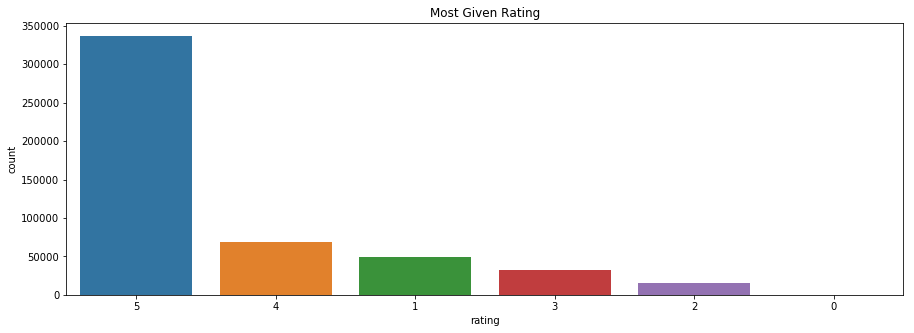

In [26]:
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
y = data.rating
fig, ax = pyplot.subplots(figsize=(15,5))
ax.set_title("Most Given Rating")
ax = sns.countplot(y,label="Rating Count",ax=ax,order=data.rating.value_counts().iloc[:10].index)  

In [4]:
from nltk.corpus import sentiwordnet as swn

In [35]:
import nltk
a=swn.senti_synset('unhappy.a.3')

In [118]:
from imblearn.under_sampling import RandomUnderSampler

ImportError: cannot import name '_astype_copy_false'

In [27]:
STOPWORDS = set(stopwords.words('english'))
appsentiments=[]
for i in range(len(data)):
        if data['app_id'][i]=='com.vectorunit.purple.googleplay':
            review = re.sub('[^a-zA-Z]', ' ',data['reviews'][i])
            review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['reviews'][i])
            review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',data['reviews'][i])#Remove bad symbols
            review = re.sub(r'\d+', '',review)
            review = review.lower()
            review = review.split()

            review = [token for token in review if token not in STOPWORDS]
            review=' '.join(review)
            appsentiments.append(review)

In [24]:
count=0
values=0
for i in range(len(data)):
    if data['app_id'][i]=='com.vectorunit.purple.googleplay':
        values=values+1
        #print(data['rating'][i])
        count =count+data['rating'][i]
print(count/values)

4.618973214285714


In [37]:
values

4480

In [94]:
STOPWORDS = set(stopwords.words('english'))
Reviews=[]
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ',data['reviews'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['reviews'][i])
    review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',data['reviews'][i])#Remove bad symbols
    review = re.sub(r'\d+', '',review)
    review = review.lower()
    review = review.split()

    review = [token for token in review if token not in STOPWORDS]
    review=' '.join(review)
    Reviews.append(review)

In [7]:
Reviews

['wonderfull app completed levels wait levels level bug get around complete touching two ballt lower left side rail let hand pick wise disappear rail great game loved',
 'good like gameplay please change music gets repetitive nd level hear track loop start way many ads also please make mode could break balls instead always levels shoot random balls',
 'really enjoyed game saw one adverts throughout ngame man woman spooning hardly appropriate young nchildren see want play innocent game pool nreally todays day age children exposed things ni deleting game hope find one innocence nmind',
 'please get rid odd shaped tables go back classic table please fix level balls cue stick disappear table making impossible continue otherwise great game disappointing unable continue end',
 'easy game play actually given pointers play nreal game pool like hit cue ball angle place nthe cue stick complaint really ninstructions say acquiring hearts coins points',
 'going lie started playing game probably hou

In [36]:
y = data['rating']
X=Reviews
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=72684)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(Reviews)

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [20]:
X_test.shape

(4480, 72684)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=50)
model = rfc.fit(X_train, y_train)
#print("Random Forest")
#print(accuracy_score(y_test, preds))

In [12]:
type(model)

sklearn.ensemble.forest.RandomForestClassifier

In [15]:
import pickle
filename = 'finalized_model.csv'
pickle.dump(model, open(filename, 'wb'))

PermissionError: [Errno 13] Permission denied: 'finalized_model.csv'

In [30]:
import pickle as cPickle
with open('predict.csv', 'wb') as f:
    cPickle.dump(model, f)

NameError: name 'model' is not defined

In [31]:
import pickle as cPickle
with open('C:\\Users\\Muhammad Umer\\PycharmProjects\\GooglePlayStore\\predict.csv', 'rb') as f:
    rf = cPickle.load(f)


preds = rf.predict(X_test)
#print("Random Forest")
#print(accuracy_score(y_test, preds))

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


NameError: name 'X_test' is not defined

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=72684)
X_test=vectorizer.transform(Reviews)
pred = rf.predict(X_test)
print("Random Forest")
print(pred)

NotFittedError: TfidfVectorizer - Vocabulary wasn't fitted.

In [4]:
sum(pred)/len(appsentiments)

NameError: name 'pred' is not defined

In [7]:
print( len(data['cetagory'].unique()) , "categories")

print("\n", data['cetagory'].unique())

14 categories

 ['Sports' 'Communication' 'action' 'Arcade' 'Video Players & Editors'
 'Weather' 'card' 'photography' 'Shopping' 'Health & Fitness' 'Finance'
 'Casual' 'Medical' 'Racing']


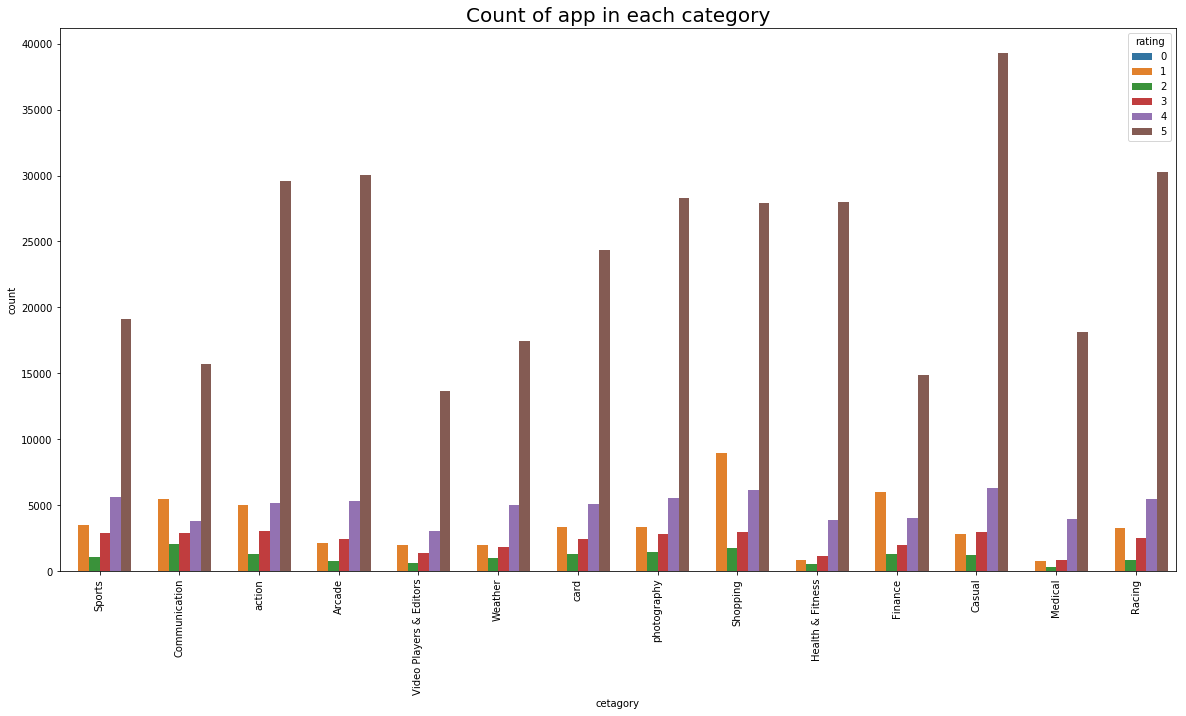

In [36]:
import seaborn as sns
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
from matplotlib import pyplot
import plotly.graph_objs as go
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(20,10))
g = sns.countplot(x="cetagory",data=data, hue=data.rating)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Count of app in each category',size = 20)
plt.savefig('Count of app in each categorys.png')

In [13]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
number_of_apps_in_category = data['cetagory'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

In [27]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()
sentimentScore=[]
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(appsentiments)):    
    message_text = appsentiments[i]

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    scores = sid.polarity_scores(message_text)
    sentimentScore.append(scores['compound'])
# Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen

#print(scores['compound'])

In [35]:
sum(sentimentScore)/len(appsentiments)

0.46316624999999484

In [102]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
biasedReview=[]
Newrating=[]
biasedRating=[]
#rat=[]
count=0
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.reviews[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    #value=scores['neg']
    rat=data.rating[i]
    if value<=0 and rat >2.5:
        count=count+1
        biasedReview.append(data.reviews[i])
        biasedRating.append(rat)
    else:
        Newrating.append(rat)
print(count)

124238


In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
biasedReview=[]
Newrating=[]
biasedRating=[]
#rat=[]
count=0
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.reviews[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    #value=scores['neg']
    rat=data.rating[i]
    if value<=0 and rat >2.5:
        count=count+1
        biasedReview.append(data.reviews[i])
        biasedRating.append(rat)
    else:
        Newrating.append(rat)
print(count)

124238


In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
biasedReview=[]
Newrating=[]
biasedRating=[]
#rat=[]
from textblob import TextBlob
count=0
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.reviews[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    #value=scores['neg']
    rat=data.rating[i]
    if value<=0 and rat >=2:
        count=count+1
        biasedReview.append(data.reviews[i])
        biasedRating.append(rat)
    else:
        Newrating.append(rat)
print(count)

134079


In [70]:
df = pd.DataFrame(biasedRating)
#The game cheats and way too many advertisemen

In [25]:
dfWithTwoRating = pd.DataFrame(
    {'biasedRating': biasedRating,
     'biasedReview': biasedReview
     
    })


In [28]:
dfWithTwoRating.biasedRating.value_counts()

5    89034
4    20479
3    14725
2     9841
Name: biasedRating, dtype: int64

In [29]:
dfWithTwoRating.biasedRating.count()

134079

In [30]:
dfWithTwoRatingNew = pd.DataFrame(
    {'Newrating': Newrating
     
    })
dfWithTwoRatingNew.Newrating.value_counts()

5    247747
1     49608
4     47940
3     17513
2      5764
0         7
Name: Newrating, dtype: int64

In [75]:
data.rating.value_counts()

5    336781
4     68419
1     49608
3     32238
2     15605
0         7
Name: rating, dtype: int64

In [113]:
df = pd.DataFrame(
    {'biasedRating': biasedRating,
     'biasedReview': biasedReview
     
    })
df.head(2)

,biasedRating,biasedReview
0,4,"Very easy game to play, and has actually give..."
1,5,I'm not going to lie.I just started playing t...


In [116]:
df.to_csv(r'BiasedDataset.csv')


In [114]:
#df.to_csv(r'BiasedDataset.csv')
df.biasedRating.value_counts()

5    89034
4    20479
3    14725
Name: biasedRating, dtype: int64

In [117]:
df1 = pd.DataFrame(
    {'NewRating': Newrating
     
    })
df1.head(2)
df1.to_csv(r'BiasedDatasetNewRating.csv')

In [86]:
df1.NewRating.value_counts()

5    247747
1     49608
4     47940
3     17513
2     15605
0         7
Name: NewRating, dtype: int64

In [94]:
len(biasedReview)

124238

In [101]:
biasedRating.count(2)

0

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentimentScore=[]
#rat=[]
count=0
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.reviews[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    #value=scores['neg']
    rat=data.rating[i]
    if value<=0 and rat > 2.5:
        count=count+1
print(count)

124238


In [ ]:
for i in range(len(data)): 
    if data.cetagory=='Sports':
        sportsReviews.append(data.re)

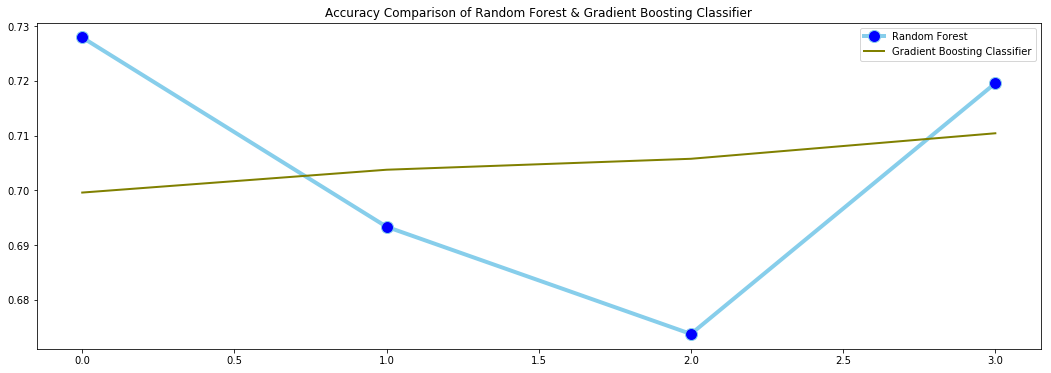

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x1=[0.72791,0.69333,0.67375,0.71955]
x2=[0.69958,0.70375,0.70575,0.71041]
# Data
df=pd.DataFrame({'x': range(0,4), 'Random Forest': x1, 'Gradient Boosting Classifier': x2})

# multiple line plot
fig, ax = plt.subplots(figsize=(18,6))
ax.set_title("Accuracy Comparison of Random Forest & Gradient Boosting Classifier")
plt.plot( 'x', 'Random Forest', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'Gradient Boosting Classifier', data=df, marker='', color='olive', linewidth=2)
plt.legend()

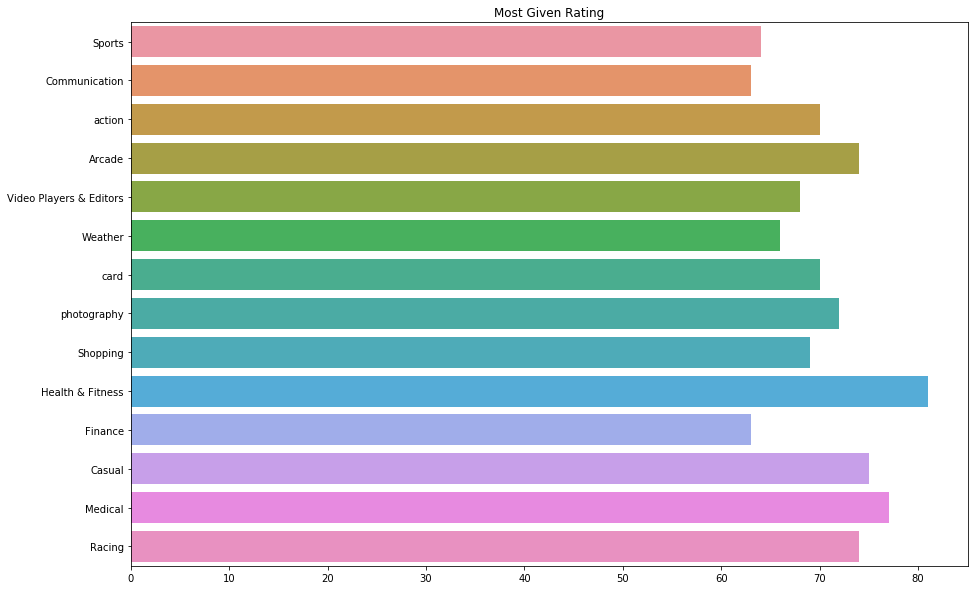

In [58]:
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
#x=category
ylist =[64,63,70,74,68,66,70,72,69,81,63,75,77,74]
fig, ax = pyplot.subplots(figsize=(15,10))
ax.set_title("Most Given Rating")
ax = sns.barplot(y=category, x=ylist,ax=ax)  

In [29]:
category=data.cetagory.unique()

In [82]:
textS='It is great my kids love to play it. Thank you for having this game on game store.'
textS=textS.lower()

In [83]:
cleaned=re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", textS.strip())
cleaned =re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)

In [84]:
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
tokens = word_tokenize(cleaned)
result = [i for i in tokens if not i in stop_words]
review=' '.join(result)
review

'great kids love play . thank game game store .'

In [87]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer= PorterStemmer()
final=[]
input_str=word_tokenize(review)
for word in input_str:
    final.append(stemmer.stem(word))
finals=' '.join(final)
finals

'great kid love play . thank game game store .'

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv1 = TfidfVectorizer()
x_traincv = cv1.fit_transform(["great kid love play . thank game game store ."])
x_traincv_df = pd.DataFrame(x_traincv.toarray(),columns=list(cv1.get_feature_names()))
x_traincv_df

C:\Users\Muhammad Umer\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


,game,great,kid,love,play,store,thank
0,0.632456,0.316228,0.316228,0.316228,0.316228,0.316228,0.316228
